# Image Thresholding


### Simple Thresholding


Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is <b>cv2.threshold</b>. First argument is the source image, which should be a <u>grayscale image</u>. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

*    cv2.THRESH_BINARY
*    cv2.THRESH_BINARY_INV
*    cv2.THRESH_TRUNC
*    cv2.THRESH_TOZERO
*    cv2.THRESH_TOZERO_INV

#### Valuable Resource :
[http://www.math.tau.ac.il/~turkel/notes/otsu.pdf](http://www.math.tau.ac.il/~turkel/notes/otsu.pdf) Refer after reading the notebook

In [112]:
import cv2
import matplotlib.pyplot as plt

In [17]:
img=cv2.imread('assets/samp1.jpeg',0)

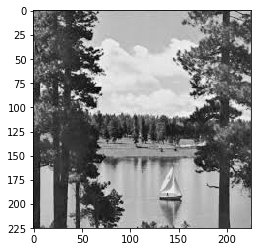

In [19]:
plt.imshow(img,cmap='gray')

### Binary Threshold

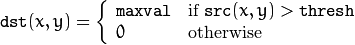

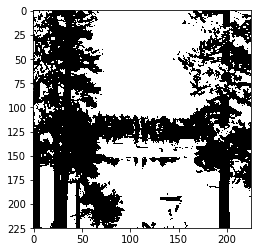

In [28]:
ret,thresh1=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

### Inverted Binary Threshold

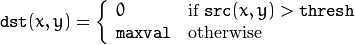

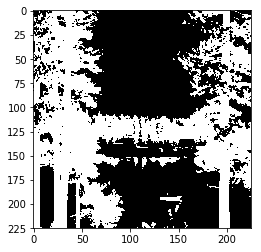

In [29]:
ret,thresh2=cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV
plt.imshow(thresh2,cmap='gray')

### Threshold Trunc

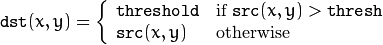

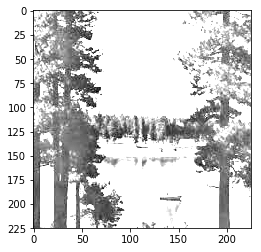

In [38]:
ret,thresh3=cv2.threshold(img,110,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

### Threshold Tozero



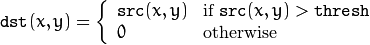

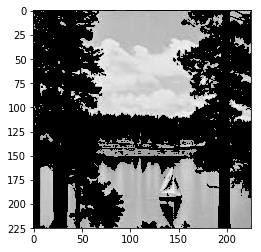

In [46]:
ret,thresh4=cv2.threshold(img,150,250,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')

### Threshold Inverted

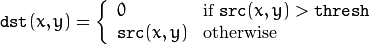

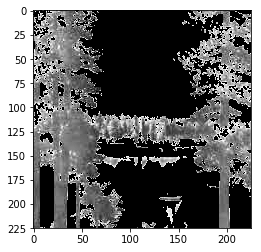

In [48]:
ret,thresh5=cv2.threshold(img,110,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')

## To Summerize all the above thresholdings:

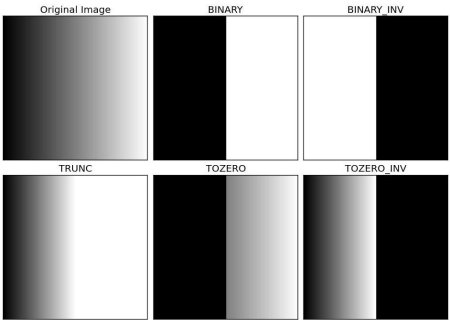

# Adaptive Thresholding


As seen before,Global Thresholding may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.<br>It has three ‘special’ input params and only one output argument.

* <b>Adaptive Method</b> - It decides how thresholding value is calculated.Two options:
     * <b>cv2.ADAPTIVE_THRESH_MEAN_C</b> : threshold value is the mean of neighbourhood area.
     * <b>cv2.ADAPTIVE_THRESH_GAUSSIAN_C</b> : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.


* <b>Block Size</b> - It decides the size of neighbourhood area.


* <b>C</b> - It is just a constant which is subtracted from the mean or weighted mean calculated.

 


In [98]:
img=cv2.imread('assets/book.jpeg',0)


### Original Image

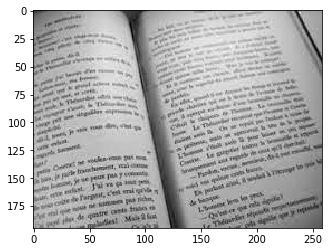

In [99]:
plt.imshow(X=img,cmap='gray')

### Global Thresholding


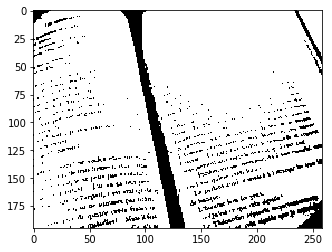

In [105]:
ret,gl=cv2.threshold(img,120,255,cv2.THRESH_BINARY)
plt.imshow(gl,cmap='gray')

### Adaptive Mean thresholding

<b>adaptiveThreshold(src, dst, maxValue, adaptiveMethod, thresholdType, blockSize, C)
</b>

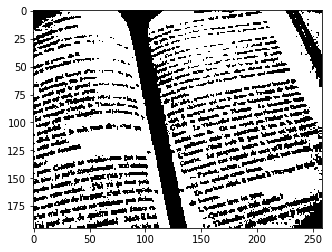

In [101]:
adpt_mean=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,115,1)
plt.imshow(adpt_mean,cmap='gray')

### Adaptive Gaussian Thresholding

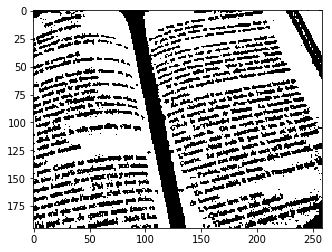

In [106]:
adpt_gauss=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
plt.imshow(adpt_gauss,cmap='gray')

Note that adaptive thresholding provides for better image readability compared to original greyscale. 

## Otsu’s Binarization

As you might have observed above there are 2 parameters returned by the threshold() function which we unpacked into a array and a 'ret' variable.Now we use this ret variable from <b>Otsu's Binarization</b>.

<b>Otsu’s thresholding chooses the threshold to minimize the
intraclass variance of the thresholded black and white pixels.</b>

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a <b>bimodal image</b> (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, <b>cv2.THRESH_OTSU</b>. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, 'ret' is same as the threshold value you used.

The mathematics for this can be found in the resource linked at the top of the notebook.

ORIGINAL


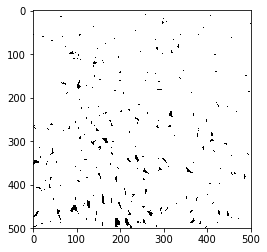

With OTSUs


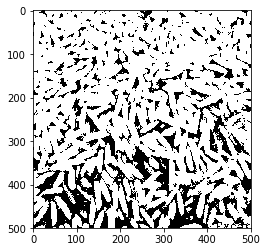

In [115]:
img=cv2.imread('assets/rice.jpg',0)

#Global Thresholding << we need to trail and error to find optimal threshold value to have satifiable feature identification
ret1,th1=cv2.threshold(img,150,255,cv2.THRESH_BINARY)

#Otsu's Thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ORIGINAL')
plt.imshow(th1,cmap='gray')
plt.show()
print('With OTSUs')
plt.imshow(th2,cmap='gray')
plt.show()

## END
